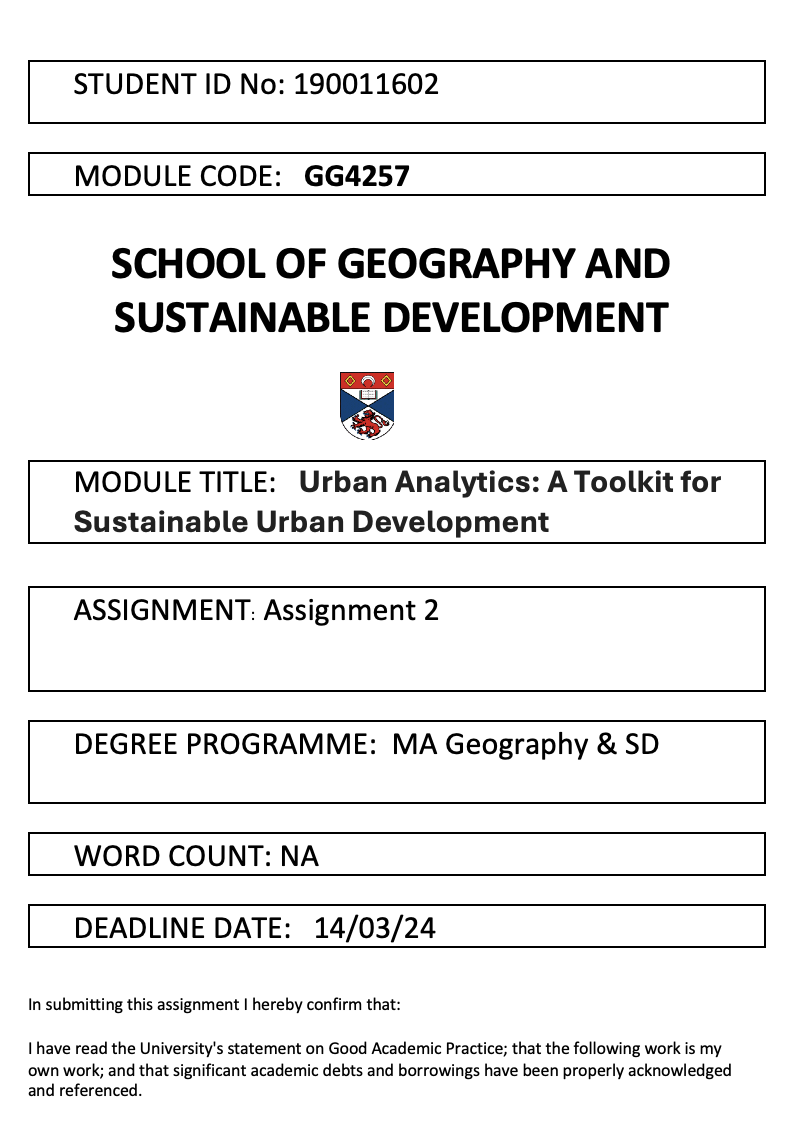

# Introduction

**GG4257** - Urban Analytics: A Toolkit for Sustainable Urban Development

**Lab Assignment No 1** : Handling and GeoVisualisation of Urban Data

---

GitHub Username: MagnusBurnet

Repository Link: https://github.com/MagnusBurnet/Lab-Assignment-2

Data: The data is all stored within the repository and should be linked. Data_1 contains data for Lab 5, and Data_2 contains data for lab 6

# Lab 5: Intro to Networks - 2 Challenges

## Challenge 1

It's time for you to apply everything you learned by analyzing a case study of GitHub's collaborator network data.

- **Data**: `github_users.p` (avaliable in Moodle)

> This dataset is a GitHub user collaboration network. As you already know, GitHub is a social coding site where users can collaborate on code repositories. In this network, nodes are users, and edges indicate that two users are collaborators on at least one GitHub repository.

1. Read the GitHub network dataset.
2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network
3. Calculate the **degree centrality** of the GitHub collaboration network G. Using the .values() method of the network (e.g. G), extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the network.
4. Make a subset of the initial network (e.g. Gh_sub), where you include at least five nodes and their corresponding edges. Experiment with multiple nodes so you have a graph with enough edges to work on.
5. Plot the subset graph created.
6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`
7. Plot the Matrix, Arc and Circos from the subset.

#### Read the GitHub network dataset.
The next code uses the "Pickle" library to load the binary github_users. pickle data

In [ ]:
import pickle

with open('Data_1/github_users.p', 'rb') as f:
    T = pickle.load(f)
T

Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network

In [ ]:
# Using len to read the size of the graph
print(f"The size of the graph is: {len(T)}")
# Using len to read the number of edges and nodes
print(f"The number of edges in the graph is: {len(T.edges())}")
print(f"The number of edges in the graph is: {len(T.nodes())}")

#### Degree Centrality
Calculate the **degree centrality** of the GitHub collaboration network G. Using the .values() method of the network, extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the network.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
#calculate the degrees of centrality for the graph
degree_centrality = nx.degree_centrality(T)
#Extract the values using .values() and convert to a list
centrality_values = list(degree_centrality.values())

#plot and format histogram of values
plt.hist(centrality_values, bins=10)
plt.title('Histogram of Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()

Make a subset of the initial network (e.g. Gh_sub), where you include at least five nodes and their corresponding edges. Experiment with multiple nodes so you have a graph with enough edges to work on

In [ ]:
#List the edges in the graph
list(T.edges)

In [ ]:
#Create a subset edges group with the selected nodes from T
edges_from_T=T.edges(['u6', 'u65', 'u3', 'u24', 'u627'])
edges_from_T

Plot the subset graph created.

In [ ]:
#Create an empty graph
Gh_sub = nx.DiGraph()

#Add the edge selections
Gh_sub.add_edges_from(edges_from_T)

#Plot the graph using nx.draw
plt.figure(figsize=(8, 8))
nx.draw(Gh_sub, with_labels=True)
plt.show()

#### Betweenness centrality
Calculate and plot betweenness centrality

In [ ]:
#Calculate ebetweenness centrality
betweenness_centrality = nx.betweenness_centrality(Gh_sub)

In [ ]:
#Create a histogram
#Extract the values and convert to a list
betweenness_values = list(betweenness_centrality.values())

#plot and format histogram of values
plt.hist(betweenness_values, bins=10)
plt.title('Histogram of Betweenness Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()

#### Plots
Plot the Matrix, Arc and Circos from the subset.

In [ ]:
import nxviz as nv
#Plot the matrix
nv.MatrixPlot(Gh_sub)
plt.show()

In [ ]:
#Plot the Arc
nv.ArcPlot(Gh_sub)
plt.show()

In [ ]:
#plot the Circos
nv.CircosPlot(Gh_sub)
plt.show()

## Challenge 2

This challenge is about OSMnx. You will explore and analyze a city's street network using the OSMnx Python library.

1. Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.
2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.
3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot
4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.
5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.
6. Create the figure-groud from the selected city
7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.
8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.
9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.

The street network i will be examining is **Gentofte**, a commune of Copenhagen

In [ ]:
import networkx as nx
import osmnx as ox

#Use osmnx to download the Gentofte street network
Gent = ox.graph_from_place("Gentofte, Denmark", network_type="drive")

fig, ax = ox.plot_graph(Gent, node_size=5, edge_linewidth=0.5)

Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.

In [ ]:
import warnings
#Outputs basic stats for the area: 'n' = Node count, 'm' = Edge Count
#Tell python to ignore warnings 
warnings.filterwarnings('ignore')
#Project the graph
E_proj = ox.project_graph(Gent)

#Convert to geodataframe taking only nodes
nodes_proj = ox.graph_to_gdfs(E_proj, edges=False)

#Create a single geometric nbject and output general stats
graph_area_m = nodes_proj.unary_union.convex_hull.area
ox.basic_stats(E_proj, area=graph_area_m, clean_int_tol=15)

#### Plotting the street network
Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color.

In [ ]:
#Plot the graph, customising the background colour, node size and edge color
fig, ax = ox.plot_graph(Gent, bgcolor='Black', node_size=5, edge_color='Green', edge_linewidth=1)

#### Routing
Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.

In [ ]:
#Use speed module to input speed and travel time information
Gent = ox.speed.add_edge_speeds(Gent)
Gent = ox.speed.add_edge_travel_times(Gent)

In [ ]:
# Define the origin and destination points
orig = ox.distance.nearest_nodes(Gent, X=12.566259, Y=55.743531)
dest = ox.distance.nearest_nodes(Gent, X=12.545825, Y=55.739803)

In [ ]:
# find the shortest path between nodes and plot it
route = ox.shortest_path(Gent, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(Gent, route, bgcolor='Black', node_size=5, edge_color='Green', edge_linewidth=1)

#### Centrality/Betweenness Measures
Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.

In [ ]:
#Calculate the degree centralities from the graph
degree_centrality = nx.degree_centrality(Gent)
#Extract the values and convert to a list
centrality_values = list(degree_centrality.values())

#plot and format histogram of values
plt.hist(centrality_values, bins=10)
plt.title('Histogram of Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Calculate the betweenness centralities from the graph
betweenness_centrality = nx. betweenness_centrality(Gent)
#Extract the values and convert to a list
betweenness_values = list(betweenness_centrality.values())

#plot and format histogram of values
plt.hist(betweenness_values, bins=10)
plt.title('Histogram of Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()

#### Figure-groud
Create the figure-groud from the selected city

In [ ]:
import osmnx as ox
from IPython.display import Image
# configure the inline image display
img_folder = "images"
extension = "png"
size = 300
dpi = 40

#Create the figure groud
#Define the place and file path
place = "Gentofte, Denmark"
point = (55.749, 12.546)
fp = f"./Data_1/Gentofte.jpeg"
fig, ax = ox.plot_figure_ground(
    point=point,
    network_type="all",
    default_width=3.3,
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

#### Interactive maps
Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.

In [ ]:
# use ox to create interactive map of nodes
nodes = ox.graph_to_gdfs(Gent, edges=False)
nodes.explore(tiles="cartodbdarkmatter", marker_kwds={"radius": 8})

In [ ]:
# Plot nodes and edges together in a single interactive map
nodes, edges = ox.graph_to_gdfs(Gent)
m = edges.explore(color="pink", tiles="cartodbdarkmatter")
nodes.explore(m=m, color="aquamarine", marker_kwds={"radius": 6})

In [ ]:
# Map nodes interactively, colored by betweenness centrality
nx.set_node_attributes(Gent, nx.betweenness_centrality(Gent, weight="length"), name="bc")
nodes = ox.graph_to_gdfs(Gent, edges=False)
nodes.explore(tiles="cartodbdarkmatter", column="bc", marker_kwds={"radius": 8})

#### Exporting
Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.

In [ ]:
#Save the graph as a geopackage
ox.io.save_graph_geopackage(Gent, filepath = "Data_1/Street_network.gpkg", encoding='utf-8', directed=False)

In [ ]:
#Load in the Geopackage (For some reason it only loads the nodes despite it containing both the nodes and edges)
import geopandas as gpd

gdf = gpd.read_file("Data_1/Street_network.gpkg")
gdf.head()

I cannot figure out how to plot both the nodes and the edges together in 1 map from the geopackage, however I will plot them seperately.

In [ ]:
#Create an interactive map of edges from the geopackage
edges = gpd.read_file("Data_1/Street_network.gpkg", layer="edges")
edges.explore(tiles="cartodbdarkmatter")

In [ ]:
#Create an interactive map of nodes from the geopackage
nodes = gpd.read_file("Data_1/Street_network.gpkg", layer="nodes")
nodes.explore(tiles="cartodbdarkmatter")

Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

In [ ]:


# get all building footprints for Gentofte  plot them
place = "Gentofte, Denmark"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)

warnings.simplefilter('ignore', DeprecationWarning)

fig, ax = ox.plot_footprints(gdf, figsize=(12, 10))

# Lab 6: Geodemographics: 1 Challenge

## Challenge 1: Geodemographic Classification

In this challenge I will create Geodemographic Classification using the k-means clustering Algorithm for the **City of Edinburgh**.

The focus of the the classification is to inform **Service provision** decision making in Edinburgh.

It will use demographic, health, economic and housing data from the [2011 census.](https://www.scotlandscensus.gov.uk/search-the-census#/topics)

The following Topics and variables will be used to inform the classificiations:

* **KS102SC** - Age structure - Demographics
* >0 to 5
* >30 to 44
* >65 to 74
* **QS104SC** - Sex - Demographics
* >Females
* >Males
* **QS302SC** - General Health - Health
* >Good health
* >Bad health
* **QS304SC** - Long Term Health Conditions
* >No condition
* >Pysical Disability
* >Mental Health Condition
* **QS301SCb** - Provision of unpaid care
* >Provides no unpaid care
* >Provides 35 to 49 hours unpaid care a week
* **QS613SC** - Appoximated social grade
* > AB Higher and intermediate managerial/administrative/professional
* > C2 Skilled manual workers
* > DE Semi-skilled and unskilled manual workers; on state benefit, unemployed, lowest grade workers',
* **KS601SC** - Economic activity - Economic
* >Economically active: Unemployed
* >Economically active: Employee: Full-time
* >Economically active: Full-time student
* >Economically inactive: Retired
* **KS601SCb** - Adults not in employment and dependent children
* >No adults in employment in household: With dependent children
* >Dependent children in household: All ages
* **KS402SC** - Household Tenure
* >Owned: Owned outright
* >Rented: Council (Local Authorities)
* >Rented: Private landlord or letting agency

This selection topics is well suited to understanding the range of health needs and population characteristics in Edinburgh, informing health provision decision making.

**Age and Sex:** These are cricual variables that influence heath risks as some conditions are more prevelant in certain age groups and sexes.

**General health and long-term conditions:** These provide a direct indicator of a populations health. Identifying the presence of long term health conditions and disabilities is crucial to identifying groups with higher healthcare needs.

**Unpaid care:** Unpaid caregivers often require unique healthcare provisions such as additional support, training and financial aid.

**Economic Activity:** Economic activity and employment are directly linked to health, as they influence stress, poorer health and economic barriers to healthcare.

**Household Teneure:** Understanding patterns of Ten

### Preparing data from Census
A range of datasets were downloaded from the 2011 Census database. These required some preprocessing. This was done in Microsoft Excel. These preprocessed files are availiable in the datafile.

**Step 1:** Merge the seperate CSV files into 1 file and link to edinburgh output areas

In [ ]:
import pandas as pd
import os

#Link to census data file
csv_directory = "Data_2/Census_Data"

# List all the CSV files in the Census_Data folder
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

# Create empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through each CSV file
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file) 
    df_csv = pd.read_csv(csv_path, low_memory=False) 
    merged_data = pd.concat([merged_data, df_csv], axis=1)

# Save the merged dataset as Merged_Census_Data.csv
merged_data.to_csv("Data_2/Merged_Census_Data.csv", index=False)


In [ ]:
import geopandas as gpd

#Link to edinburgh output areas
shp_path = "Data_2/Edinburgh_OA/scotland_oa_2011.shp"
gdf = gpd.read_file(shp_path)

#Link to merged CSV file
csv_path = "Data_2/Merged_Census_Data.csv"
csv_data = pd.read_csv(csv_path, low_memory=False)

# Merge the GeoDataFrame with the DataFrame based on the oa_code
merged_data = gdf.merge(csv_data, left_on='code', right_on='oa_code', how='left')

#Save data to shapefile
merged_data.to_file('Data_2/Merged_Shape/merged_data.shp', index=False)

In [ ]:

#Plot histograms of some of the key attributes
import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['Owned: Owned outright',
                      'C2 Skilled manual workers',
                      'Provides 1 to 19 hours unpaid care a week',
                      'Economically active: Unemployed',
                      '60 to 64',
                      'Physical disability']

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(merged_data[attribute].astype(str), kde=True)
    plt.title(attribute)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(2, 3, i)
    merged_data[attribute] = pd.to_numeric(merged_data[attribute], errors='coerce')
    sns.violinplot(x=merged_data[attribute])
    plt.title(attribute)

plt.tight_layout()
plt.show()

The histograms and violin plots show that the data sets have a lot of variability in the dataset and are not normally distributed. This will inform how we decide to fill in NaN variables later in the challenge.

### Standardization of areas

As the output areas have different numbers of people and households, this next section is important to ensure that the values are starndardised in order that they are comparable across output areas.

To do this, each variable is converted to a percentage of its areas total. This is done by defining each variables total and value column. These are different as the data comes from many different datasets. A percentage is then calculated from these.

In [ ]:
list(merged_data.columns)

In [ ]:

#This creates a function that creates a new dataframe 
def calculate_percentages(dataframe, total_columns, value_columns):

    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
        #convert value and total collums to numerics and create NaNs for missing data
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        #Create a percentage from the value column and the total columns
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df

# List the total columns.
total_cols = ['All people',
              'All people',
              'All people',
              'All households',
              'All people.1',
              'All people.1',
              'All people aged 16 to 74',
              'All people aged 16 to 74',
              'All people aged 16 to 74',
              'All people aged 16 to 74',
              'All people.2',
              'All people.2',
              'All people.2',
              'All people.3', 
              'All people.3',
              'All people aged 16 to 64 in households',
              'All people aged 16 to 64 in households',
              'All people aged 16 to 64 in households',
              'All people.4',
              'All people.4',
              'All households.1',
              'All households.1',
              'All households.1',
              ]
# List the corresponding value columns. 
value_cols = [
     '0 to 5',
     '30 to 44',
     '65 to 74',
     'Dependent children in household: All ages',
     'Males',
     'Females',
     'Economically active: Employee: Full-time',
     'Economically active: Unemployed',
     'Economically active: Full-time student',
     'Economically inactive: Retired',
     'No condition',
     'Physical disability',
     'Mental health condition',
     'Provides no unpaid care',
     'Provides 35 to 49 hours unpaid care a week',
     'AB Higher and intermediate managerial/administrative/professional',
     'C2 Skilled manual workers',
     'DE Semi-skilled and unskilled manual workers; on state benefit, unemployed, lowest grade workers',
     'Good health',
     'Bad health',
     'Owned: Owned outright',
     'Rented: Council (Local authority)',
     'Rented: Private landlord or letting agency',
             ]

#run the function using the value and total columns
result_dataframe = calculate_percentages(merged_data, total_cols, value_cols)


In [ ]:
#Combine the new results dataframe with the merged data
concatenated_df = pd.concat([merged_data, result_dataframe], axis=1, ignore_index=False)
concatenated_df.head()

In [ ]:
list(concatenated_df.columns)

In [ ]:
#List the columns needed for the future analysis
#This list keeps the standardized data and geometry information and removes the rest
keep_cols= [
    'code',
    'popcount',
    'hhcount',
    'geometry',
     '0 to 5_percentage',
 '30 to 44_percentage',
 '65 to 74_percentage',
 'Dependent children in household: All ages_percentage',
 'Males_percentage',
 'Females_percentage',
 'Economically active: Employee: Full-time_percentage',
 'Economically active: Unemployed_percentage',
 'Economically active: Full-time student_percentage',
 'Economically inactive: Retired_percentage',
 'No condition_percentage',
 'Physical disability_percentage',
 'Mental health condition_percentage',
 'Provides no unpaid care_percentage',
 'Provides 35 to 49 hours unpaid care a week_percentage',
 'AB Higher and intermediate managerial/administrative/professional_percentage',
 'C2 Skilled manual workers_percentage',
 'DE Semi-skilled and unskilled manual workers; on state benefit, unemployed, lowest grade workers_percentage',
 'Good health_percentage',
 'Bad health_percentage',
 'Owned: Owned outright_percentage',
 'Rented: Council (Local authority)_percentage',
 'Rented: Private landlord or letting agency_percentage'

]

#create new dataframe with only the necessary columns
edinburgh_census_data = concatenated_df[keep_cols]

In [ ]:
# For more easy manipulation we define short column names
short_column_names = {
 '0 to 5_percentage': '0to5',
 '30 to 44_percentage': '30to44',
 '65 to 74_percentage': '65to74',
 'Dependent children in household: All ages_percentage':'Dep_child',
 'Males_percentage':'Men',
 'Females_percentage':'Women',
 'Economically active: Employee: Full-time_percentage':'Employed',
 'Economically active: Unemployed_percentage':'Unemployed',
 'Economically active: Full-time student_percentage':'Student',
 'Economically inactive: Retired_percentage':'Retired',
 'No condition_percentage':'No_Condition',
 'Physical disability_percentage':'Phys_Disability',
 'Mental health condition_percentage':'Ment_Condition',
 'Provides no unpaid care_percentage':'No_unpaid_care',
 'Provides 35 to 49 hours unpaid care a week_percentage':'Unpaid_care',
 'AB Higher and intermediate managerial/administrative/professional_percentage':'Professional',
 'C2 Skilled manual workers_percentage':'Skilled',
 'DE Semi-skilled and unskilled manual workers; on state benefit, unemployed, lowest grade workers_percentage':'Unskilled',
 'Good health_percentage':'Healthy',
 'Bad health_percentage':'Unhealthy',
 'Owned: Owned outright_percentage':'House_owned',
 'Rented: Council (Local authority)_percentage':'Council_house',
 'Rented: Private landlord or letting agency_percentage':'House_rented'

}

edinburgh_census_data = edinburgh_census_data.rename(columns=short_column_names)

### Measure the variables for association

Measuring each variables correlation with the others is important as if two variables are highly correlated then a certain phenomenon may be given a higher weight as they are being represented by two or more variables.

In this section every variable is tested for its correlation with every other vairable using a Pearsons coefficient. If two variables are highly correlated (>0.8) then one of the variables is removed in order to avoid multi multicollinearity.


In [ ]:
#Filter the data to include only numeric values
numeric_columns = edinburgh_census_data.select_dtypes(include='float64')
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

In [ ]:
#Caluclate and plot the z values for each relationship
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
#For ease of interpretation,
#the following code plots the same table however highlights only the variables with >0.75 correlation.
threshold = 0.75 

highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

As you can see, there are a few variables which are highly correlated; **No_Condition**, and **Phys_Disability**. This makes sense as if a household were to have a family member with a physical disability, they will not be listed as being a no condition household

There is also a correlation between **Retired** and **65to74**. This is also understandable as the retirement age in the UK is 65.

**Men** and **Women** are also highly correlated.

One of each of these variables will be removed from the analysis.

In [ ]:
#Drop the highly correlated variables
z_score_df.drop(['No_Condition','65to74','Men',], axis=1, inplace=True)

In [ ]:
#Re-plot the z-value correlations to check for highly correlated variables

corr_2 = z_score_df.corr()
threshold = 0.75
highly_correlated_2 = (corr_2.abs() > threshold) & (corr_2.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated_2, cmap='coolwarm', cbar=False, annot=True)

plt.title('New Highly Correlated Variables')
plt.show()

Next, the data is tested for any NaN Values. These are dealst with using a method called Imputation. This replaces the NaN value with an estimate from the data. In this case the median of the rest of the data is used to impute as generally the distribution of the data is skewed

In [ ]:
contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The dataFrame does not contain NaN values")

In [ ]:
z_score_df.fillna(z_score_df.median(), inplace=True)

In [ ]:
z_score_df.head()

In [ ]:
# For more easy manipulation we define short column names
short_column_names = {
    '30 to 44_percentage': '30to44',
    '0 to 5_percentage': '0to5',
    '75 to 84_percentage': '75to84',
    'Females_percentage': 'Females',
    #'Males_percentage': 'Males',
    'Good health_percentage': 'Good_Health',
    'Bad health_percentage': 'Bad_Health',
    'Physical disability_percentage': 'Phyical_dis',
    'Mental health condition_percentage': 'Mental_health',
    'Provides no unpaid care_percentage': 'No_unpaid_care',
    'Provides 50 or more hours unpaid care a week_percentage': 'Unpaid_care',
    'Economically inactive: Student_percentage': 'Student',
    #'Economically active: Unemployed_percentage': 'Unemployed',
    'Economically active: Employee: Part-time_percentage': 'Part_time_empl',
    'Economically active: Employee: Full-time_percentage': 'Full_time_empl',
    'No adults in employment in household: With dependent children_percentage': 'Unempl+child',
#    'Dependent children in household: All ages_percentage': 'Dep_Children',
#    'Does not speak English well_percentage': 'Bad_English',
#    'Speaks English well_percentage': 'Good_English',
    'DE Semi-skilled and unskilled manual workers; on state benefit, unemployed, lowest grade workers_percentage': 'Unskilled',
    'AB Higher and intermediate managerial/administrative/professional_percentage': 'Managerial',
}

z_score_df = z_score_df.rename(columns=short_column_names)
edinburgh_census_data = edinburgh_census_data.rename(columns=short_column_names)

### K-Means Clustering

the K-Means clustring method involves a predetermined number of clusters and works by minimizing the distances between data points and their respective cluster centers

It does this by creating a predefined number of seed and scattering them randomly. Each datapoint is then attached to its cloces seed. A new seed is then created at the centroid of each cluster. This is repeated untill the distance between every datapoint and the centroids can no longer be reduced.

The first step in this process is determining the optimum number of centroids and clusters. The clusters must be as homogenous as possible, distict from each other and have similar numbers of datapoints in each cluster.

To do this, we can examine the distribution of the data.

#### Elbow method

We can determine the optimum number of clusters by plotting the squared differences between the each observation and its cluster center. The larger the sum the more spread out the cluster and the more dissimilar it is from the rest of the cluster.

Plotting the squared differences against the number of clusters and look for a sharp change in the plot. This is known as the elbow plot.

The code below plots calculates the sum of squared distances for each number of clusters and plots them.

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist


Sum_of_squared_distances = []

K_range = range(1,15)

for k in K_range:
 km = KMeans(n_clusters=k)
 km = km.fit(z_score_df)
 Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Plotting the squred distances from the clusters shows the 'elbow' to be at around 6. We will therefore cluster the data into **6 groups** using K Means. 

In this next step, the distribution of datapoints in each cluster is plotted using a histogram. 

In [ ]:

# KMeans with 6 clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_
z_score_df['Cluster'] = kmeans.labels_

plt.hist(labels)

The Histogram shows that there is a farily even distribution of datapoints across the 6 clusters.

In [ ]:
# KMeans with 6 clusters, after the validation with the Elbow method and histogram
kmeans = KMeans(n_clusters=6)
kmeans.fit(z_score_df)
labels = kmeans.predict(z_score_df)
cluster_centres = kmeans.cluster_centers_

#Create a new collumn which defines the cluster of each output area,
z_score_df['Cluster'] = kmeans.labels_

### Visualising the clusters

In this next section, the datapoint in each cluster is plotted  in order to visualise how they are distributed as well as to see how datapoints from seperate clusters overlap.

The key purpose of this is to visualize the dataset's structure in a 2 dimensional space, identifying clusters and understanding the variance captured by the principal components.

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))

kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

#removes mean and scales
scaler = StandardScaler()

#Standardizes z_score_df 
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysis: Reduces dimentionallity to 2 principle components
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

# Create a scatter plot
fig = px.scatter(x=pca_result[:, 0], y=pca_result[:, 1], color=clusters,
                 labels={'color': 'Cluster'},
                 #title='Cluster Plot against 1st 2 Principal Components',
                 opacity=0.7,
                 width=800, 
                 height=800)

plt.tight_layout()
fig.show()

print(f"These two components explain {(variance_ratio.sum()*100):.2f}% of the point variability.")

In [ ]:
#applies PCA to reduce the dimensionality to 2 dimensions, and visualizes the clusters 

kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(z_score_df)

z_score_df['Cluster'] = clusters

#Standardizes z_score_df 
scaler = StandardScaler()
stand_data_scaled = scaler.fit_transform(z_score_df)

# PCA analysis: Reduces dimentionallity to 2 principle components
pca = PCA(n_components=2).fit(stand_data_scaled)
pca_result = pca.transform(stand_data_scaled)

#Percentage of variance explained by each of the selected components.
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title('Cluster Plot against 1st 2 Principal Components')
plt.xlabel(f'Principal Component 1 variation: {variance_ratio[0]*100:.2f}%')
plt.ylabel(f'Principal Component 2 variation: {variance_ratio[1]*100:.2f}%')
plt.legend(title='Clusters')
plt.show()

The two scatterplots show that across the 6 clusters, there are a few overlaping clusters. This is because the variables that we have used only explain 42% of the patterns shown in the dataset as shown in the first plot.

#### Plotting the cluster centers as radial plots

In order understand the cluster it is important to understand what the defining features of each cluster are. This next code bit of code creates a radar plot which shows how different features of each cluster are distributed away from 0. This shows which features contribute to each clusters profile.

In [ ]:
# KMeans clustering
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(z_score_df)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_


# Get the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=z_score_df.columns)

# Create a new DataFrame with cluster assignments and column names
#result_df = pd.DataFrame({'Cluster': clusters, 'Column': z_score_df.columns})

cluster_centers.head(6)

In [ ]:
import numpy as np
#Plotting cluster group 1
#Define the row being analysed
first_row_centers = cluster_centers.iloc[0, :-1]

# len of features
num_features = len(first_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, first_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0.
ax.plot(theta, np.zeros_like(first_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns[:-1], rotation=45, ha='right')

plt.show()

In [ ]:
#Plotting cluster group 2
#Define the row being analysed
second_row_centers = cluster_centers.iloc[1, :-1]

# len of features
num_features = len(second_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, second_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value showing the mean
ax.plot(theta, np.zeros_like(second_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns[:-1], rotation=45, ha='right')

plt.show()

In [ ]:
#Plotting cluster group 3
#Define the row being analysed
third_row_centers = cluster_centers.iloc[2, :-1]

# len of features
num_features = len(third_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, third_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value showing the mean
ax.plot(theta, np.zeros_like(third_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns[:-1], rotation=45, ha='right')

plt.show()

In [ ]:
#Plotting cluster group 4
#Define the row being analysed
fourth_row_centers = cluster_centers.iloc[3, :-1]

# len of features
num_features = len(fourth_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, fourth_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value showing the mean
ax.plot(theta, np.zeros_like(fourth_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns[:-1], rotation=45, ha='right')

plt.show()

In [ ]:
#Plotting cluster group 5
#Define the row being analysed
fifth_row_centers = cluster_centers.iloc[4, :-1]

# len of features
num_features = len(fifth_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, fifth_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value showing the mean
ax.plot(theta, np.zeros_like(fifth_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns[:-1], rotation=45, ha='right')

plt.show()

In [ ]:
#Plotting cluster group 6
#Define the row being analysed
sixth_row_centers = cluster_centers.iloc[5, :-1]

# len of features
num_features = len(sixth_row_centers)

# polar coordinates
theta = np.linspace(0, 2 * np.pi, num_features, endpoint=True)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, sixth_row_centers, linewidth=1, color='blue', marker='o', label='Centers')
# Add an extra red line at the 0.0 value showing the mean
ax.plot(theta, np.zeros_like(sixth_row_centers), color='red', linestyle='--', label='Avarage')

ax.set_xticks(theta)
ax.set_xticklabels(cluster_centers.columns[:-1], rotation=45, ha='right')

plt.show()

### Area Classifications

Having analysed the attributes of each clusters, the named clusters below reflect the key attributes of each cluster.

The the clusters appear to vary every time this challenge is run. I think this is due to the random nature of the K means process. Maybe if the groups were more distinct this would not be the case? I have therefore attached screenshots of the radial plots when I ran them.

**Cluster 1: The Student Hub**
* >Students
* >Rented housing
* >Providing no Unpaid Care

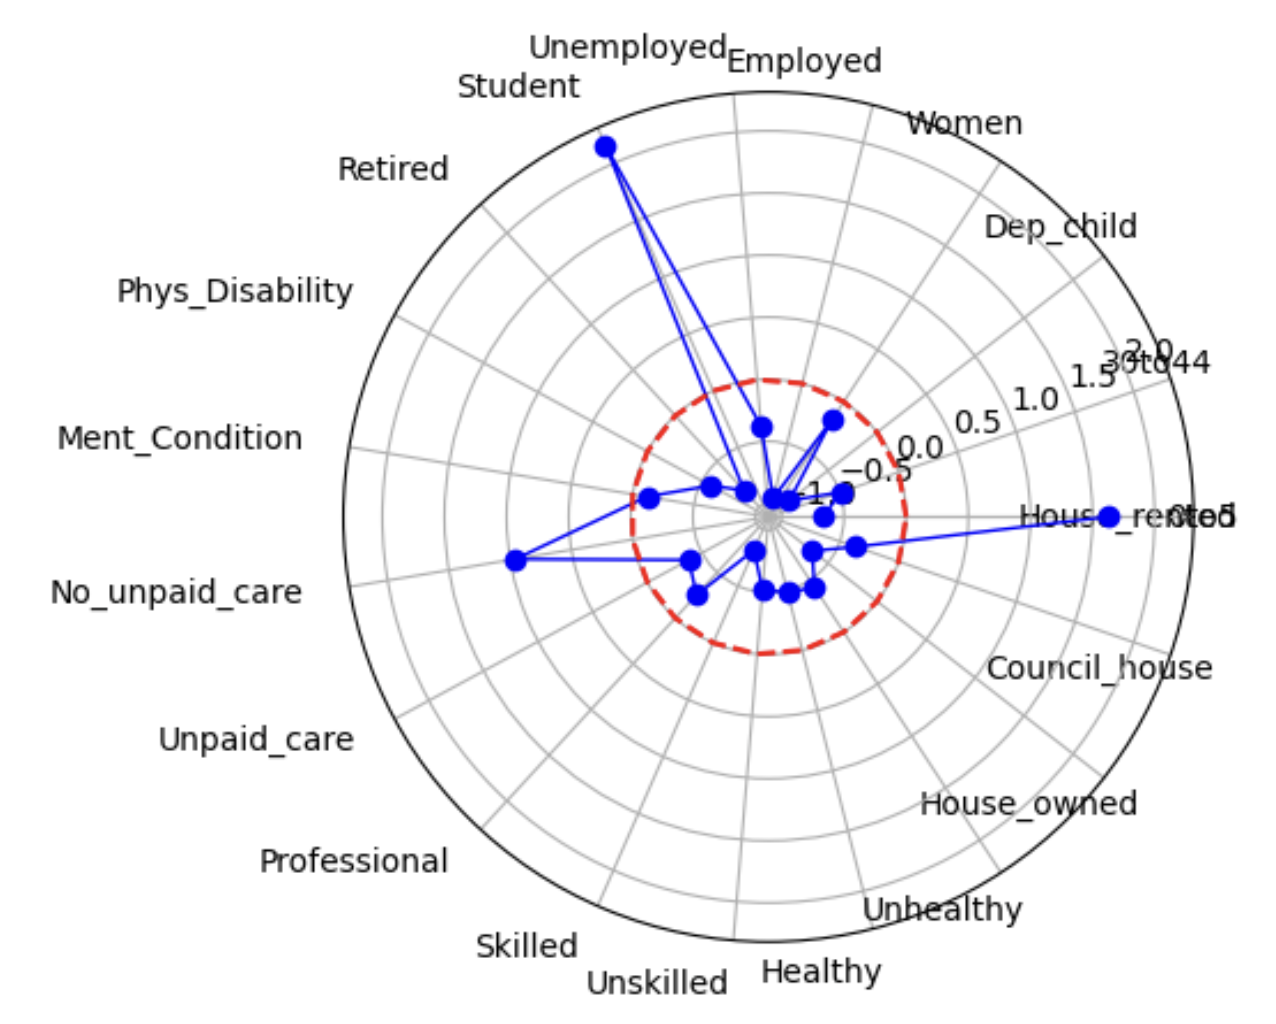

**Cluster 2: The Family Professionals**
* >Professionals
* >Dependent Children
* >Retired

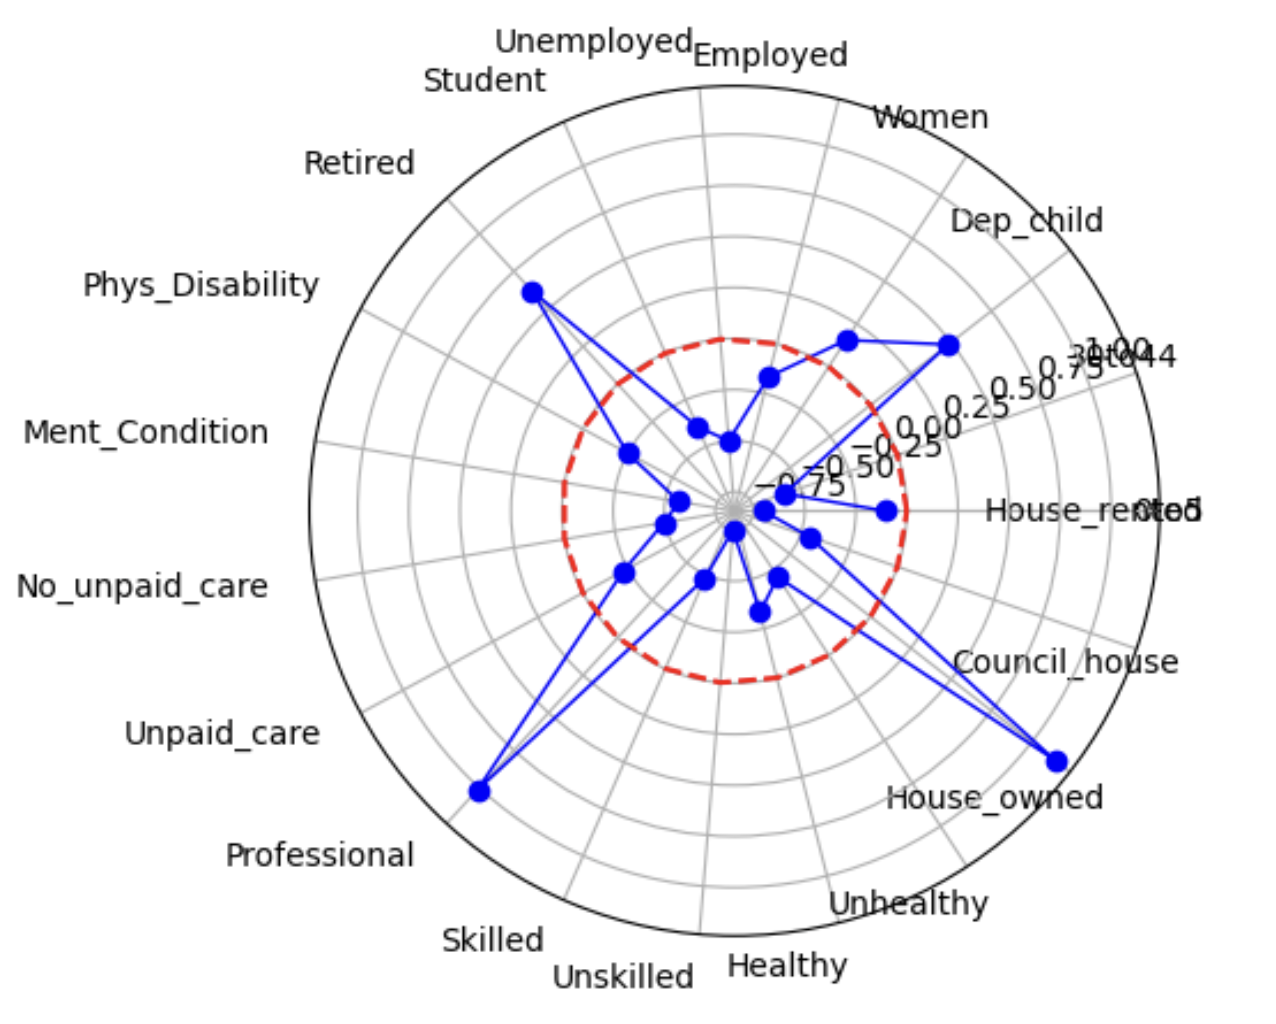

**Cluster 3: The Working Renters**
* >Middle Aged
* >Rented Housing
* >Employed
* >Providing no Unpaid Care
* >Healthy

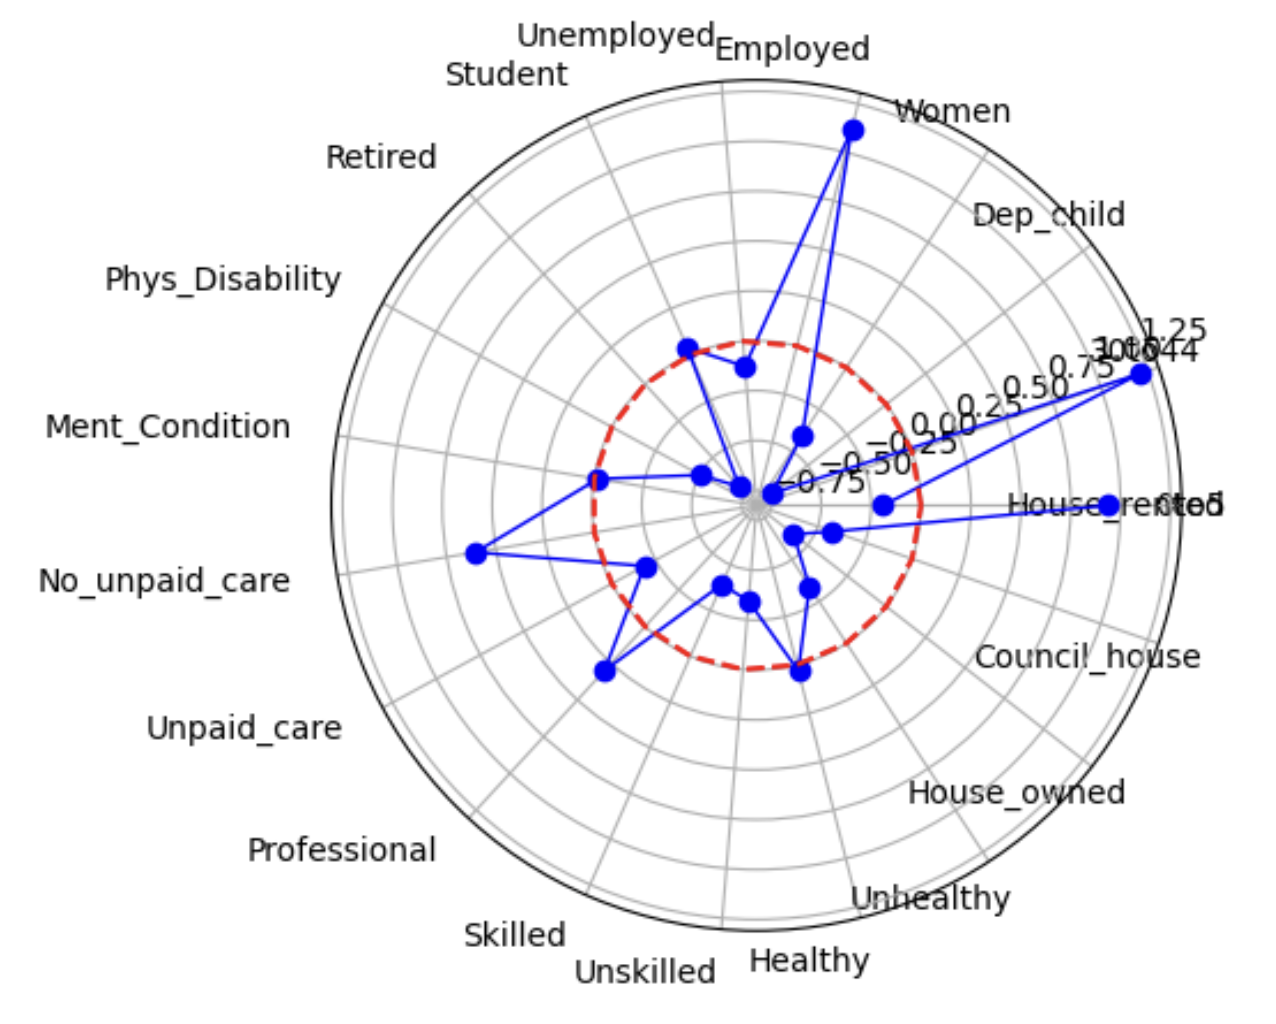

**Cluster 4: The Care Community**
* >Unskilled
* >Unhealthy
* >Council Housed
* >Mental and physical disabilities 
* >Providing unpaid care

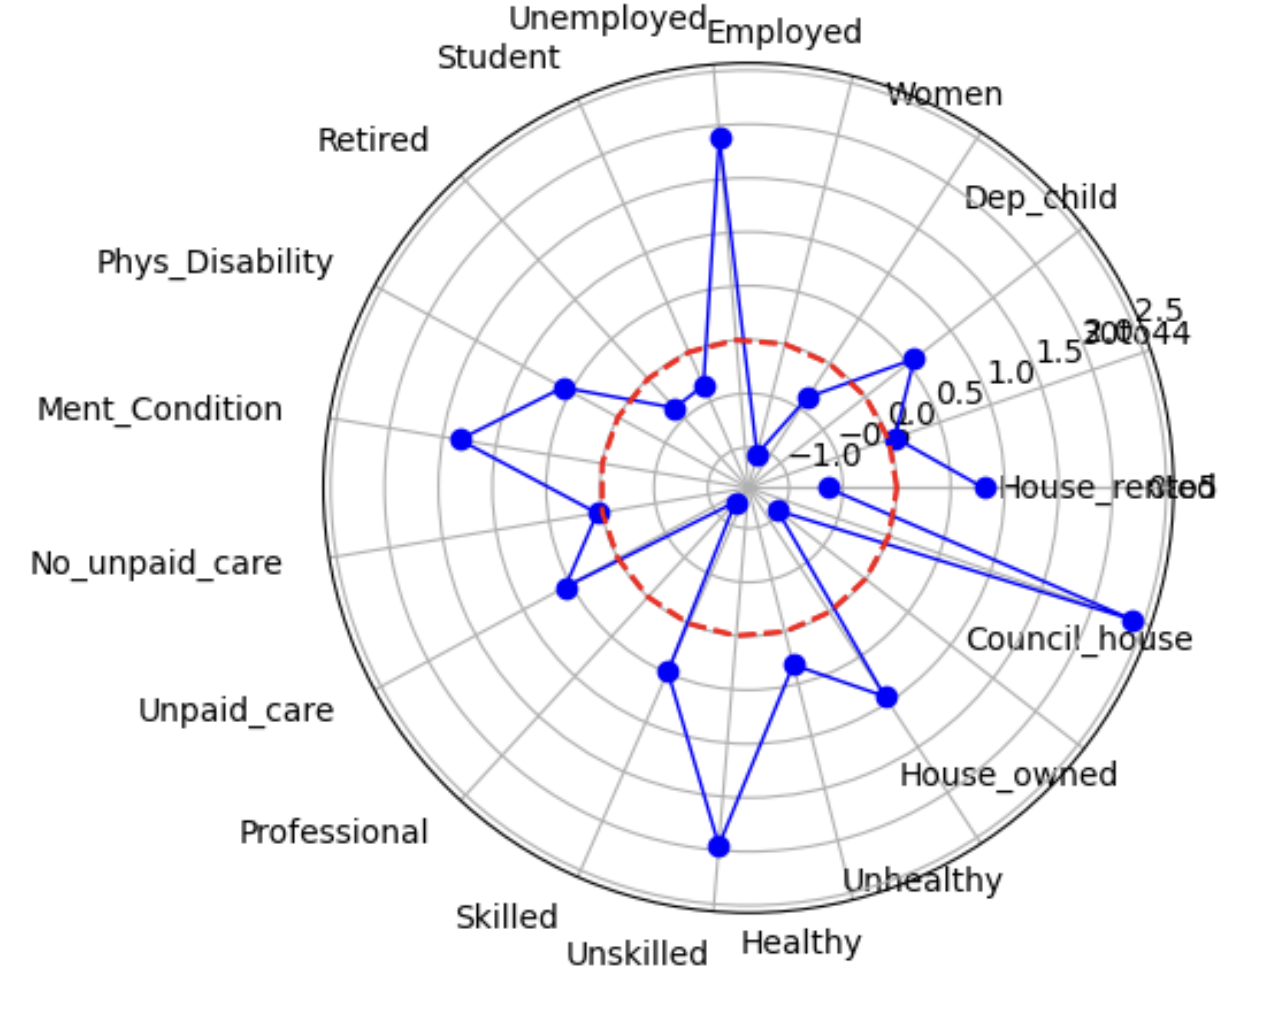

**Cluster 5: The Healthy Professionals**
* >Employed
* >Professionals
* >Middle aged
* >Healthy

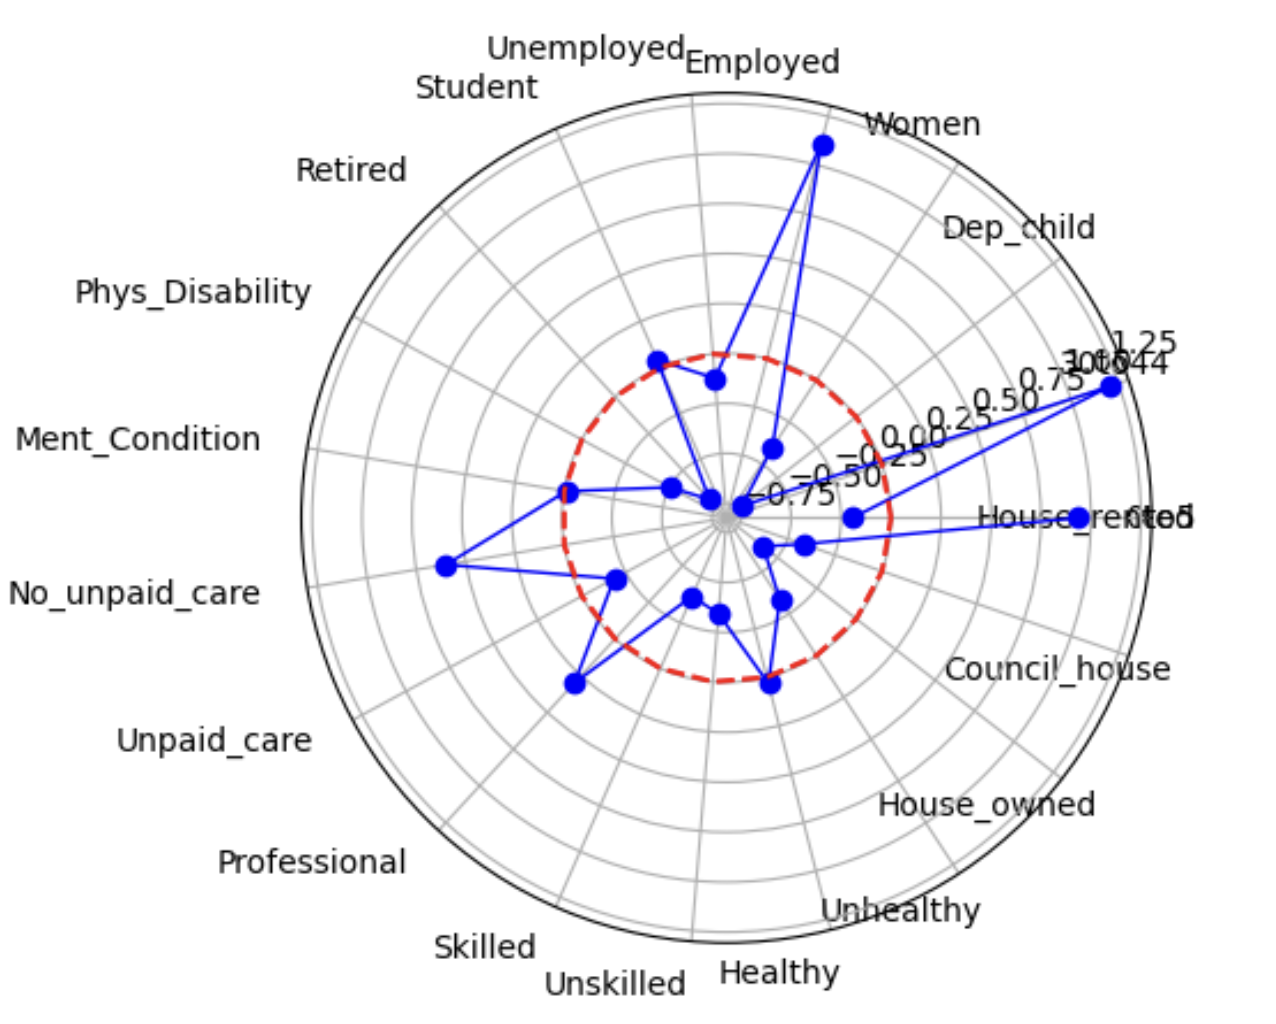

**Cluster 6: The Secure Retirees**
* >Retired
* >Physically disabled
* >Owned house
* >Skilled
* >Women

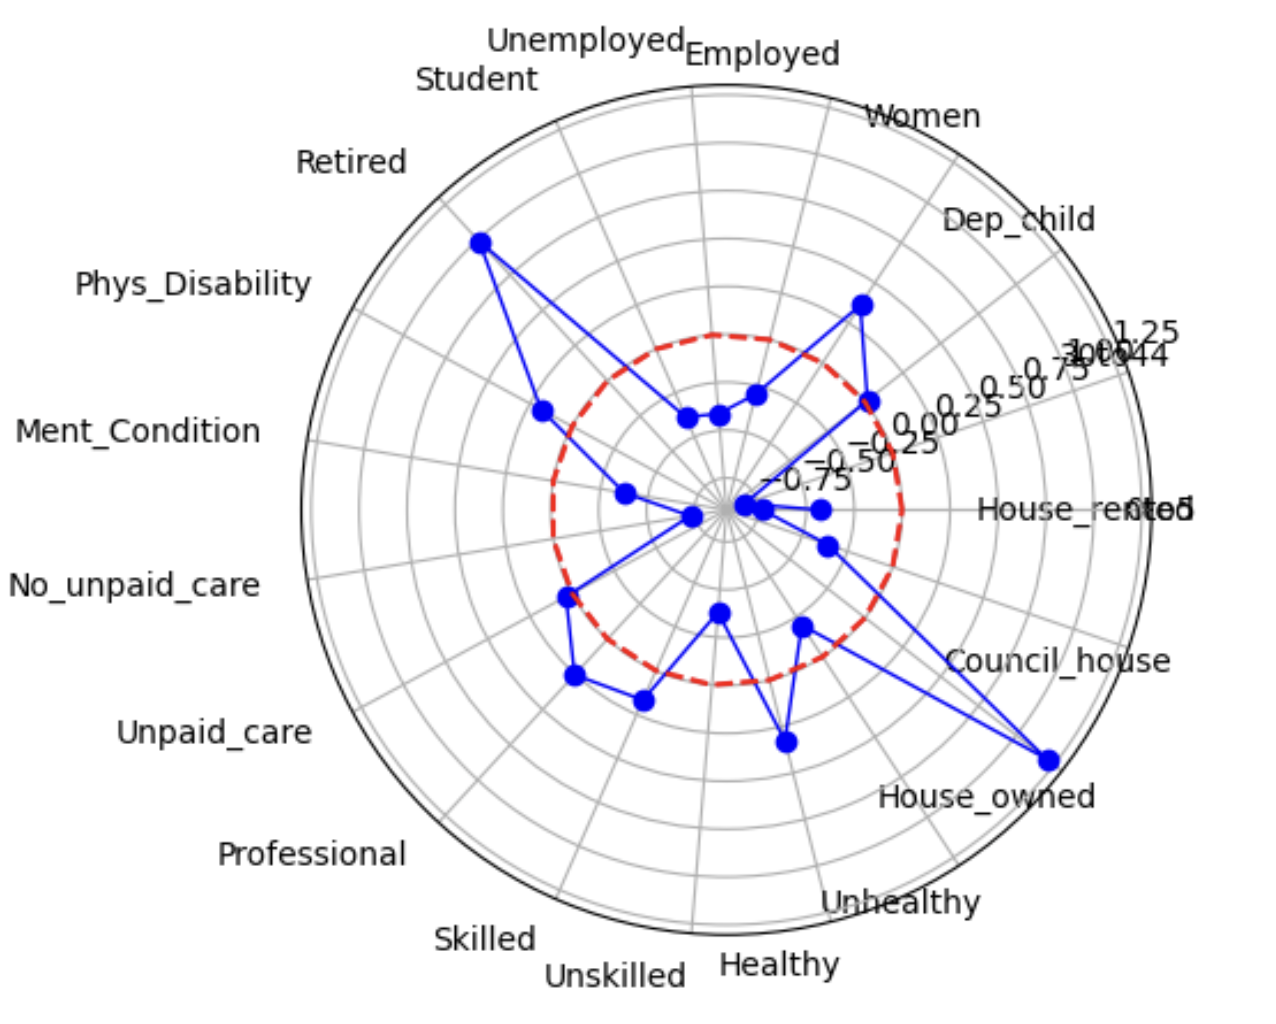

### Mapping the clusters 
The following code links the z_score data and the edinburgh output areas. It also names the clusters in order that they can be better visualised.

It then visualises and maps the clusters across edinburgh.

In [ ]:
#Drop all the variables apart from the cluster and ID data to avoid duplicating data
z_score_df.drop([
'0to5',
'30to44',
'Dep_child',
'Women',
'Employed',
'Unemployed',
'Student',
'Retired',
'Phys_Disability',
'Ment_Condition',
'No_unpaid_care',
'Unpaid_care',
'Professional',
'Skilled',
'Unskilled',
'Healthy',
'Unhealthy',
'House_owned',
'Council_house',
'House_rented'], axis=1, inplace=True)
z_score_df.info()

In [ ]:
#Link the census data and the z_score data frame
final_df = pd.concat([edinburgh_census_data, z_score_df], axis=1, ignore_index=False)

In [ ]:
#convert cluster collumn to string from int
final_df['Cluster'] = final_df['Cluster'].astype('string')

#create funcion that renames the clusters
def rename_column(x): 
    x = x.replace("0", "The Student Hub")
    x = x.replace("1", "The Family Professionals")
    x = x.replace("2", "The Working Renters")
    x = x.replace("3", "The Care Community")
    x = x.replace("4", "The Healthy Professionals")
    x = x.replace("5", "The Secure Retirees")
    return x

#Run function through the cluster column
final_df['Cluster'] = final_df['Cluster'].apply(rename_column)

In [ ]:
#Create an interactive map of the clusters across the edinburgh output areas
final_df.explore(column='Cluster', cmap='Set3', tiles='CartoDB positron')

# Limitations & Difficulties

I experience a number of difficulties across these two labs.

**Lab 5: Challenge 2:** I was unable to load the created Geopackage so that it included both nodes and edges. It was clear that the package contained both as I could import them seperately but not together.

**Lab 6:** The main challenge I faced here was with the cluster creation. It seems to me that every time the code is run, the clusters change slightly. This means that the features of each cluster vary between the runs and the final map also varys.

